<a href="https://colab.research.google.com/github/sarangoz/An-litica-de-Negocios/blob/main/Parcial_1_AN_Sara_Arango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1 - Sara Arango

**Descripción del caso de estudio**

Este trabajo busca analizar los factores asociados al riesgo de sufrir un ataque cardiaco en la población colombiana. La importancia de este estudio radica en que las enfermedades cardiovasculares representan una de las principales causas de muerte en el país, por lo que resulta fundamental comprender qué variables clínicas y de estilo de vida inciden más en dicho riesgo.

Para este análisis se utiliza una base de datos sintética que contiene 8.763 registros de pacientes a nivel mundial, incluyendo información detallada sobre aspectos clínicos, estilos de vida y características sociodemográficas.

El objetivo principal es identificar aquellas variables con mayor poder explicativo frente a la probabilidad de un ataque cardiaco en Colombia y, a partir de ellas, implementar modelos de analítica predictiva y de segmentación que apoyen la toma de decisiones en salud pública.

Las variables consideradas son:

- Age: Edad del paciente.

- Cholesterol: Niveles de colesterol.

- Heart Rate: Frecuencia cardiaca.

- Exercise Hours Per Week: Número de horas de ejercicio semanal.

- Income: Nivel de ingresos.

- BMI: Índice de masa corporal (IMC).

- Triglycerides: Niveles de triglicéridos.

- Sleep Hours Per Day: Promedio de horas de sueño diario.

- Heart Attack Risk: Variable objetivo que indica si existe riesgo de ataque cardiaco (1: Sí, 0: No).


El estudio aplica diferentes técnicas de machine learning: un modelo de Naive Bayes y un Árbol de Decisión como métodos supervisados de clasificación, así como un K-Means con cinco clusters como técnica de agrupamiento no supervisada. Estos modelos permiten tanto predecir la probabilidad de riesgo individual como segmentar perfiles de pacientes con características similares. De esta forma, se combinan enfoques predictivos y exploratorios para ofrecer una visión integral del problema.



In [27]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier #modelo de arbol de decision
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [28]:
#Cargamos base de datos
nxl = "/content/3. heart_attack_pronostico_int.xlsx"
XDB = pd.read_excel(nxl, sheet_name=0)

# Seleccionar las columnas
colum = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Income', 'BMI', 'Triglycerides', 'Sleep Hours Per Day','Heart Attack Risk', 'Country']
XDB = XDB[colum].dropna()

# Filtrar por país Colombia
XDB_clb= XDB[XDB['Country'] == 'Colombia'].copy()

# Datos de Colombia
print(f"Cantidad de datos de Colombia: {len(XDB_clb)}")

# Eliminar la columna 'Country' del DataFrame filtrado para la correlación
XDB_col = XDB_clb.drop(columns=['Country']).corr()
display(XDB_col)

Cantidad de datos de Colombia: 429


,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Income,BMI,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
Age,1.000000,0.014132,0.051301,0.048247,-0.071857,0.022756,0.021517,0.012974,-0.029439
Cholesterol,0.014132,1.000000,0.007361,0.019232,-0.007063,0.011324,-0.023835,-0.025238,-0.016527
Heart Rate,0.051301,0.007361,1.000000,0.054585,-0.019636,0.016666,0.024880,-0.016652,0.013987
Exercise Hours Per Week,0.048247,0.019232,0.054585,1.000000,0.070837,0.092595,-0.000712,-0.002744,0.050076
Income,-0.071857,-0.007063,-0.019636,0.070837,1.000000,0.050035,0.030304,-0.074491,0.065634
BMI,0.022756,0.011324,0.016666,0.092595,0.050035,1.000000,-0.003307,-0.017578,-0.071936
Triglycerides,0.021517,-0.023835,0.024880,-0.000712,0.030304,-0.003307,1.000000,-0.055970,0.084714
Sleep Hours Per Day,0.012974,-0.025238,-0.016652,-0.002744,-0.074491,-0.017578,-0.055970,1.000000,-0.033025
Heart Attack Risk,-0.029439,-0.016527,0.013987,0.050076,0.065634,-0.071936,0.084714,-0.033025,1.000000


En la correlación con Heart Attack Risk los valores son bajos, lo que indica que ninguna variable por sí sola explica mucho el riesgo. Aun así, las cinco más relevantes resultaron ser 'Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day'.

In [29]:
from re import X
#Porcentaje de personas con riesgo de sufrir un ataque cardiaco
XDB_clb['Heart Attack Risk'].value_counts(normalize=True)*100

,proportion
Heart Attack Risk,
0,62.237762
1,37.762238


El 37.8% de los pacientes colombianos en la base presentan riesgo de ataque cardiaco, mientras que el 62.2% no lo presentan.

In [30]:
# Definimos variables de entrada y salida
XD=XDB_clb[['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day']]
yd=XDB_clb[['Heart Attack Risk']]

# Modelo de Naive Bayes

In [31]:
#Se implementa el modelo de clasificación Naive-Bayes
mnb = GaussianNB()  #Coco del modelo
mnb.fit(XD,yd)     #Entrenamiento del modelo

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [32]:
#Determinamos las propiedades estadísticas de las variables
np.set_printoptions(suppress=True,precision=3) #Para decimales
u = mnb.theta_   #Media de variables por categoría
print("'Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day'")
print("")
print("La media de las variables es:\n", u)
print("")

#Datos por categoría
ndat = mnb.class_count_
print("El número de datos por categoría es:\n", ndat)
cat = mnb.classes_
print("Las categorías son:\n", cat)
print("")

sigma = np.sqrt(mnb.var_)  #Desviación estandar de variables por categoría
print("La desviación estandar de las variables es:\n", sigma)
print("")

print("Los límites superiores de las variables son:\n", u + sigma)
print("")

print("Los límites superiores de las variables son:\n", u - sigma)

'Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day'

La media de las variables es:
 [[     9.651 152847.393     29.066    390.09       7.022]
 [    10.24  163714.821     28.136    430.957      6.889]]

El número de datos por categoría es:
 [267. 162.]
Las categorías son:
 [0 1]

La desviación estandar de las variables es:
 [[    6.202 79023.434     6.622   235.626     3.238]
 [    6.289 81835.996     6.945   228.722     3.154]]

Los límites superiores de las variables son:
 [[    15.853 231870.828     35.687    625.716     10.261]
 [    16.529 245550.817     35.081    659.679     10.043]]

Los límites superiores de las variables son:
 [[    3.449 73823.959    22.444   154.464     3.784]
 [    3.952 81878.825    21.192   202.234     3.735]]


In [33]:
#Se procede con la evaluación de desempeño del modelo (frente al pronóstico de la decisión)
ydb = mnb.predict(XD)

# Matriz de confusión
cm = confusion_matrix(yd, ydb)
print("Matriz de confusión Naive Bayes:\n", cm)

Matriz de confusión Naive Bayes:
 [[260   7]
 [158   4]]


El Naive Bayes clasificó bien la mayoría de los casos sin riesgo (260 aciertos), pero tuvo muchísimos falsos negativos (158 personas con riesgo clasificadas como sanas) y apenas identificó 4 positivos reales.

In [34]:
#Metricas de desempeño
# Total de datos
TD = len(XD)

# Valores de la Matriz de Confusión
VN = cm[0,0]  # Verdaderos Negativos
FP = cm[0,1]  # Falsos Positivos
FN = cm[1,0]  # Falsos Negativos
VP = cm[1,1]  # Verdaderos Positivos

# Exactitud
Ex = (VP + VN) / TD
print("Exactitud:", Ex)

# Tasa de error
Ter = (FP + FN) / TD
print("Tasa de error:", Ter)

# Sensibilidad (Recall para positivos)
Sen = VP / (VP + FN)
print("Sensibilidad:", Sen)

# Especificidad
Esp = VN / (VN + FP)
print("Especificidad:", Esp)

# Precisión (Precision para positivos)
Pre = VP / (FP + VP)
print("Precisión:", Pre)

# Precisión Negativa
Prn = VN / (VN + FN)
print("Precisión negativa:", Prn)

Exactitud: 0.6153846153846154
Tasa de error: 0.38461538461538464
Sensibilidad: 0.024691358024691357
Especificidad: 0.9737827715355806
Precisión: 0.36363636363636365
Precisión negativa: 0.6220095693779905


In [35]:
#Clasificacion persona
# 'Cholesterol', 'Sleep Hours Per Day', 'Exercise Hours Per Week', 'Triglycerides', 'Income'
XI = [200, 6, 1, 230, 285768]
ydpi = mnb.predict([XI])
resultado = "puede sufrir de ataque cardiaco" if ydpi[0] == 1 else "no va a sufrir de ataque cardiaco"
print("La categoría de la persona es:", ydpi, "y", resultado)

La categoría de la persona es: [0] y no va a sufrir de ataque cardiaco


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Modelo Árbol de Decisión

In [36]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4) #en depth 5 pq es el numero de variables de entrada pero casi no se ve ent 4 por hoy
mar.fit(XD,yd)

#Para la grafica del arbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(mar,feature_names=XD.columns)
graph = graph_from_dot_data(dot_data)
graph.write_png('ArbolParcial1.png')

True

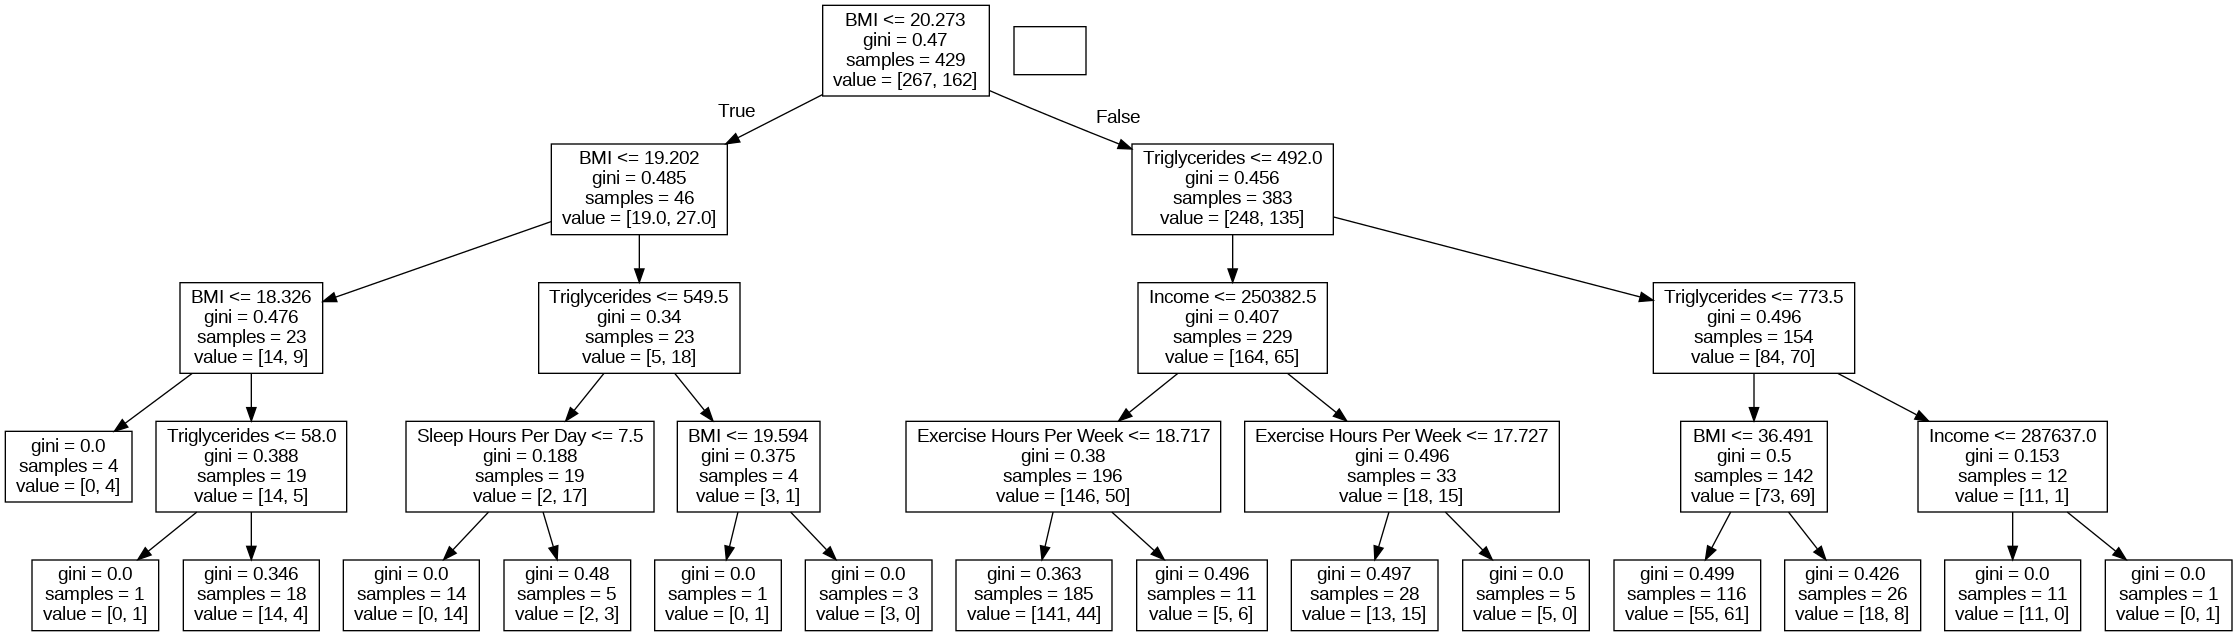

In [49]:
#Hallar reglas nodos puros
from sklearn.tree import _tree

def extract_pure_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    rules = []

    def recurse(node, conditions):
        if tree_.feature[node] == _tree.TREE_UNDEFINED:
            values = tree_.value[node][0]
            if sum(v > 0 for v in values) == 1:
                pred_class = values.argmax()
                rules.append({
                    "conditions": " AND ".join(conditions),
                    "samples": tree_.n_node_samples[node],
                    "gini": tree_.impurity[node],
                    "prediction": pred_class,
                    "value": values.tolist()
                })
        else:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            # Rama True: <=
            recurse(tree_.children_left[node],
                    conditions + [f"{name} <= {threshold:.3f}"])
            # Rama False: >
            recurse(tree_.children_right[node],
                    conditions + [f"{name} > {threshold:.3f}"])

    recurse(0, [])
    return rules

# Extraer reglas puras
rules = extract_pure_rules(mar, XD.columns)

# Mostrar reglas
print("Nodos puros:")
print("")
for i, r in enumerate(rules, 1):
    print(f"{i}: {r['conditions']} "
          f"(samples={r['samples']}, value={r['value']})")



Nodos puros:

1: BMI <= 20.273 AND BMI <= 19.202 AND BMI <= 18.326 (samples=4, value=[0.0, 1.0])
2: BMI <= 20.273 AND BMI <= 19.202 AND BMI > 18.326 AND Triglycerides <= 58.000 (samples=1, value=[0.0, 1.0])
3: BMI <= 20.273 AND BMI > 19.202 AND Triglycerides <= 549.500 AND Sleep Hours Per Day <= 7.500 (samples=14, value=[0.0, 1.0])
4: BMI <= 20.273 AND BMI > 19.202 AND Triglycerides > 549.500 AND BMI <= 19.594 (samples=1, value=[0.0, 1.0])
5: BMI <= 20.273 AND BMI > 19.202 AND Triglycerides > 549.500 AND BMI > 19.594 (samples=3, value=[1.0, 0.0])
6: BMI > 20.273 AND Triglycerides <= 492.000 AND Income > 250382.500 AND Exercise Hours Per Week > 17.727 (samples=5, value=[1.0, 0.0])
7: BMI > 20.273 AND Triglycerides > 492.000 AND Triglycerides > 773.500 AND Income <= 287637.000 (samples=11, value=[1.0, 0.0])
8: BMI > 20.273 AND Triglycerides > 492.000 AND Triglycerides > 773.500 AND Income > 287637.000 (samples=1, value=[0.0, 1.0])


In [38]:
ydp=mar.predict(XD) #Vamos a estresar el modelo - backtesting
cm_tree = confusion_matrix(yd, ydp)
print("Matriz de confusión Árbol de Decisión:\n", cm_tree)

Matriz de confusión Árbol de Decisión:
 [[192  75]
 [ 56 106]]


El modelo clasificó 192 verdaderos negativos y 106 verdaderos positivos, lo que significa que identificó correctamente tanto a personas sin riesgo como a un número considerable de personas con riesgo. Sin embargo, se presentan 75 falsos positivos (personas clasificadas con riesgo cuando en realidad no lo tienen) y 56 falsos negativos (personas en riesgo que no fueron detectadas).

In [39]:
#Metricas de desempeño
# Total de datos
TD = len(XD)

# Valores de la Matriz de Confusión
VN = cm_tree[0,0]  # Verdaderos Negativos
FP = cm_tree[0,1]  # Falsos Positivos
FN = cm_tree[1,0]  # Falsos Negativos
VP = cm_tree[1,1]  # Verdaderos Positivos

# Exactitud
Ex = (VN + VP) / TD
print("Exactitud:", Ex)

# Tasa de error
Ter = (FP + FN) / TD
print("Tasa de error:", Ter)

# Sensibilidad (Recall para positivos)
Sen = VP / (VP + FN)
print("Sensibilidad:", Sen)

# Especificidad
Esp = VN / (VN + FP)
print("Especificidad:", Esp)

# Precisión (Precision para positivos)
Prec = VP / (VP + FP)
print("Precisión:", Prec)

# Precisión Negativa
Prn = VN / (VN + FN)
print("Precisión negativa:", Prn)

Exactitud: 0.6946386946386947
Tasa de error: 0.30536130536130535
Sensibilidad: 0.654320987654321
Especificidad: 0.7191011235955056
Precisión: 0.585635359116022
Precisión negativa: 0.7741935483870968


# Método de Clusterización del tipo K-Means

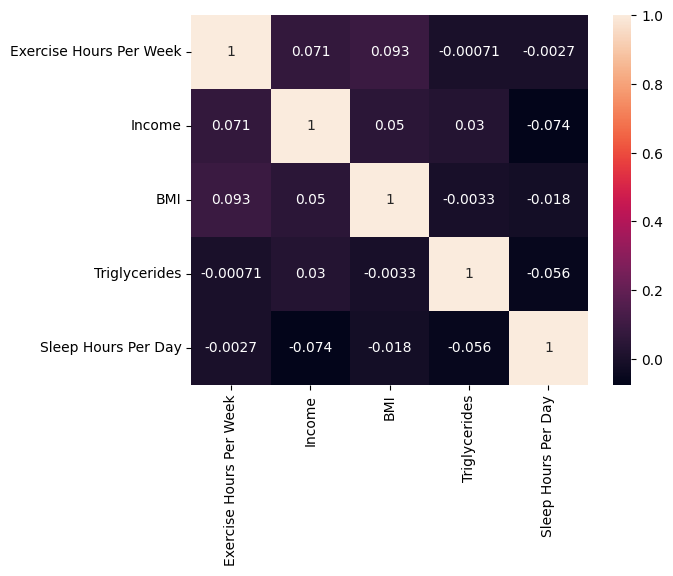

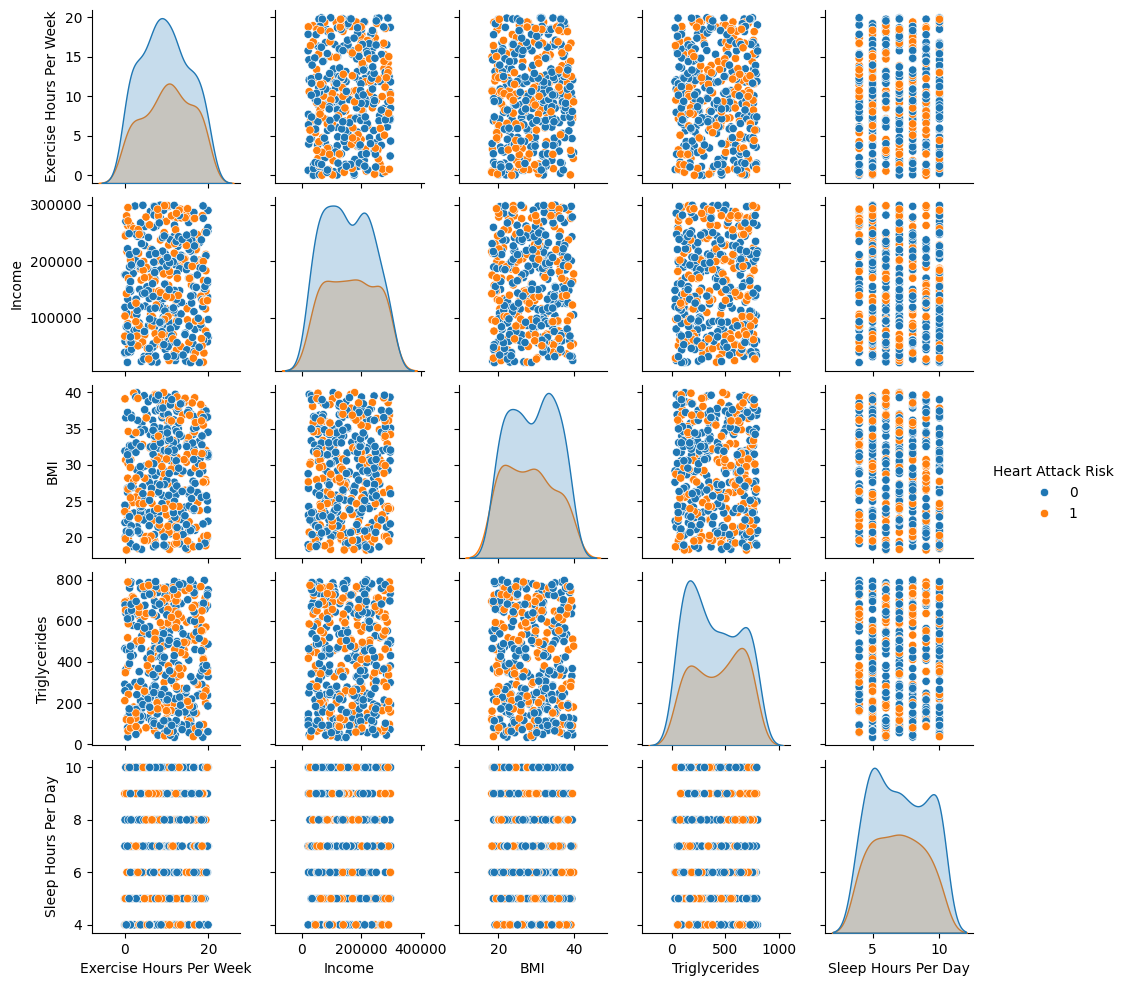

In [40]:
#Analisis de correlacion - Cuales variables tienen mas afinidad
import seaborn as sns

corr = XDB_clb.drop(columns=['Country']).corr()
sns.heatmap(XDB_clb[['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day']].corr(), annot=True)
plt.show()

sns.pairplot(XDB_clb, hue= 'Heart Attack Risk', height=2, vars=['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day'])
plt.show()

los títulos son:
 ['Exercise Hours Per Week', 'Income', 'BMI', 'Triglycerides', 'Sleep Hours Per Day']
Determinar las características de cada uno de los clsuters:
 [[    10.545 144999.405     28.682    401.544      7.177]
 [     9.124  97851.595     28.204    384.27       7.068]
 [    10.404 203773.388     29.079    429.194      7.031]
 [     9.965 268841.231     28.964    399.121      6.582]
 [     9.208  48295.862     28.508    407.241      7.046]]


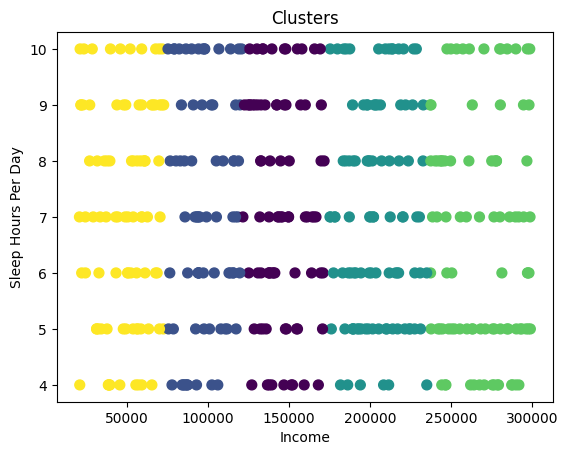

In [41]:
np.random.seed(42)  #Se crean los mismos números aleatorios

#Se procede con la caracterización de los labels
k = 5
mkm=KMeans(n_clusters=k,init='random',random_state=42)
mkm.fit(XD,yd)
centroids = mkm.cluster_centers_
ydc = mkm.labels_

vs=['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day']
print("los títulos son:\n",str(vs))
print("Determinar las características de cada uno de los clsuters:\n",centroids)

plt.figure()
plt.scatter(XD['Income'], XD['Sleep Hours Per Day'], c=ydc, s=50, cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Sleep Hours Per Day')
plt.title('Clusters')
plt.show()

In [42]:
ND=np.bincount(ydc) #Cuantos datos hay por Cluster
print("Numero de datos por cluster:", ND)
XDB_clb["Cluster"]=ydc

Numero de datos por cluster: [79 74 98 91 87]


In [43]:
#Medias de cada cluster para las 5 variables seleccionadas
cluster_means = XDB.groupby(XDB_clb["Cluster"])[['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day']].mean()
print("Medias de cada variable en los clusters:")
display(cluster_means)

Medias de cada variable en los clusters:


,Exercise Hours Per Week,Income,BMI,Triglycerides,Sleep Hours Per Day
Cluster,,,,,
0.0,10.544860,144999.405063,28.682191,401.544304,7.177215
1.0,9.124484,97851.594595,28.203750,384.270270,7.067568
2.0,10.404441,203773.387755,29.078943,429.193878,7.030612
3.0,9.964734,268841.230769,28.964479,399.120879,6.582418
4.0,9.208167,48295.862069,28.507622,407.241379,7.045977


- Exercise Hours per Week: el promedio más alto está en el Cluster 0 (10.54 h/semana) y el más bajo en el Cluster 4 (9.21 h/semana).
- Income: el valor más alto se presenta en el Cluster 3 (268,841) y el más bajo en el Cluster 4 (48,296).
- BMI: el promedio mayor está en el Cluster 2 (29.08) y el menor en el Cluster 1 (28.20).
- Triglycerides: la media más alta se da en el Cluster 2 (429.19) y la más baja en el Cluster 1 (384.27).
- Sleep Hours per Day: el promedio más alto está en el Cluster 0 (7.18 h/día) y el más bajo en el Cluster 3 (6.58 h/día).

In [44]:
#Porcentajes de sufrir ataques de corazon por cluster
Ataque=XDB.groupby(XDB_clb["Cluster"])[['Heart Attack Risk']].value_counts()
Conataque=XDB.groupby(XDB_clb["Cluster"]).agg({"Heart Attack Risk":lambda x: (x==1).sum()})
Sinataque=XDB.groupby(XDB_clb["Cluster"]).agg({'Heart Attack Risk':lambda x: (x==0).sum()})

Conataque['Porcentaje']=Conataque['Heart Attack Risk']/ND*100
print("")
print("Porcentaje de personas con riesgo de sufrir ataque cardiago por cluster:")
print(Conataque)
print("")
print("Porcentaje de personas sin riesgo de sufrir ataque cardiago por cluster:")
Sinataque['Porcentaje']=Sinataque['Heart Attack Risk']/ND*100
print(Sinataque)


Porcentaje de personas con riesgo de sufrir ataque cardiago por cluster:
         Heart Attack Risk  Porcentaje
Cluster                               
0.0                     32   40.506329
1.0                     22   29.729730
2.0                     34   34.693878
3.0                     41   45.054945
4.0                     33   37.931034

Porcentaje de personas sin riesgo de sufrir ataque cardiago por cluster:
         Heart Attack Risk  Porcentaje
Cluster                               
0.0                     47   59.493671
1.0                     52   70.270270
2.0                     64   65.306122
3.0                     50   54.945055
4.0                     54   62.068966


- El Cluster 3 tiene la proporción más alta de personas con riesgo de ataque cardiaco (45.1%), lo que lo convierte en el grupo más vulnerable.
- El Cluster 1 es el de menor riesgo, con solo 29.7% en condición positiva.

In [45]:
# Determinar la predicción del cluster (basado en si el porcentaje de riesgo es mayor que el de no riesgo)
ydp = np.zeros(len(XDB_clb["Cluster"]))
for i in range(len(XDB_clb["Cluster"])):
    cluster_id = XDB_clb["Cluster"].iloc[i]
    # Acceder a los DataFrames usando .loc con el ID del cluster como flotante
    if Conataque.loc[float(cluster_id), 'Porcentaje'] > Sinataque.loc[float(cluster_id), 'Porcentaje']:
        ydp[i] = 1
    else:
        ydp[i] = 0

In [46]:
#Calcular la matriz de confusión comparando el riesgo real con la predicción basada en el cluster
cm = confusion_matrix(XDB_clb["Heart Attack Risk"], ydp)
print("Matriz de confusión Clustering Kmeans:\n", cm)

Matriz de confusión Clustering Kmeans:
 [[267   0]
 [162   0]]


El modelo asignó a todas las personas en la clase “0” (sin riesgo), dejando en cero la detección de positivos. Esto explica la matriz: 267 verdaderos negativos y 162 falsos negativos, sin un solo positivo identificado.

In [47]:
# Calcular métricas de desempeño
VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]
TD=len(XDB_clb["Cluster"])

Exactitud=(VP+VN)/TD; print("la exactitud es:",Exactitud)
Ter=(FN+FP)/TD; print("la tasa de error es:",Ter)
# Manejar el caso de división por cero si VP+FN es cero
Sen=VP/(VP+FN) if (VP+FN) != 0 else 0; print("la sensibilidad es:",Sen)
# Manejar el caso de división por cero si VN+FP es cero
Esp=VN/(VN+FP) if (VN+FP) != 0 else 0; print("la especificidad es:",Esp)
# Manejar el caso de división por cero si FP+VP es cero
Pr=VP/(FP+VP) if (FP+VP) != 0 else 0; print("la precision es:",Pr)
# Manejar el caso de división por cero si VN+FN es cero
prn=VN/(VN+FN) if (VN+FN) != 0 else 0; print("la prediccion negativa es:",prn)

la exactitud es: 0.6223776223776224
la tasa de error es: 0.3776223776223776
la sensibilidad es: 0.0
la especificidad es: 1.0
la precision es: 0
la prediccion negativa es: 0.6223776223776224


In [48]:
#Pronósticar la posibilidad que tienen las personas en pronostico
# Cargar los datos de la Hoja 1 del archivo de Excel
nxl = '/content/3. heart_attack_pronostico_int.xlsx'
XDBH1 = pd.read_excel(nxl, sheet_name=1)

XDBH1=XDBH1[['Exercise Hours Per Week','Income','BMI','Triglycerides','Sleep Hours Per Day']]
XDBH1=XDBH1.dropna()

ydp1=mkm.predict(XDBH1.values)
print("La respuesta de la predicción es:",ydp1)

proba= mnb.predict_proba(XDBH1)
print("Riesgo de no tener / Riesgo de tener:", mnb.classes_)
print("Probabilidades de cada persona de sufrir o no un ataque cardiaco:")
print(proba)

La respuesta de la predicción es: [4 2 2]
Riesgo de no tener / Riesgo de tener: [0 1]
Probabilidades de cada persona de sufrir o no un ataque cardiaco:
[[0.714 0.286]
 [0.611 0.389]
 [0.678 0.322]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Análisis de resultados
El análisis se realizó con un total de 429 registros de personas en Colombia, con el propósito de identificar los factores que más inciden en el riesgo de sufrir un ataque cardiaco y de evaluar distintos modelos de predicción. La base de datos contenía variables numéricas relacionadas con aspectos de salud y estilo de vida: edad, colesterol, frecuencia cardiaca, horas de ejercicio por semana, ingresos, índice de masa corporal (BMI), triglicéridos y horas de sueño por día. Al calcular la correlación de cada una de estas variables con la variable objetivo (Heart Attack Risk), se determinó que las cinco de mayor relación fueron: triglicéridos, ingreso, horas de ejercicio por semana, BMI y horas de sueño por día. Estas variables se tomaron como base para la construcción de los modelos.'

En cuanto a la distribución de la variable objetivo, el 62.2% de los individuos no presentaron riesgo de ataque cardiaco, mientras que el 37.8% sí presentaron riesgo, lo cual refleja un desbalance moderado en los datos que influye en el desempeño de los modelos predictivos.

Se implementaron dos modelos supervisados de clasificación: Naive Bayes y Árbol de Decisión. El Naive Bayes presentó una exactitud de 61.5% y una sensibilidad muy baja de apenas 2.5%, lo que significa que casi no logró identificar a las personas en riesgo. Su especificidad fue alta (97.4%), pero esto se explica porque predijo de forma correcta a la mayoría de las personas sin riesgo, lo que confirma que el modelo no es adecuado para este problema. En contraste, el Árbol de Decisión obtuvo un desempeño significativamente mejor: exactitud de 69,4%, sensibilidad de 65.4% y especificidad de 71,9%. Esto indica que el modelo logró un equilibrio razonable entre la correcta identificación de personas en riesgo y de aquellas que no lo están, aunque aún persiste una limitación en la detección de verdaderos positivos (falsos negativos relativamente altos).

El Árbol de Decisión también permitió derivar reglas de negocio a partir de los 8 nodos puros. Estas reglas muestran combinaciones específicas de valores en las variables seleccionadas que definen perfiles de riesgo o no riesgo de ataque cardiaco. Estas reglas resultan especialmente valiosas porque son interpretables y pueden servir a la entidad de salud como insumos para diseñar intervenciones focalizadas.

Por otro lado, se aplicó un modelo de clusterización K-Means con cinco grupos, como estrategia no supervisada para segmentar a la población en perfiles con características similares. Al evaluar los porcentajes de riesgo por cluster, se encontró que el cluster 3 tuvo la mayor proporción de personas con riesgo (45.0%), seguido por el cluster 0 (40.5%). El cluster 1 presentó el menor porcentaje de riesgo (29.7%). Esto evidencia que, aunque K-Means no funciona como clasificador (ya que su sensibilidad fue 0 y predijo a todos como “sin riesgo”), sí aporta información relevante para identificar grupos de individuos con mayor prevalencia de riesgo, lo que puede apoyar en la priorización de campañas de prevención. Además, el análisis de las medias de las variables por cluster permitió identificar que los ingresos fueron más altos en el cluster 3, mientras que los triglicéridos alcanzaron su mayor promedio en el cluster 2, y el BMI fue mayor en el cluster 2 y menor en el cluster 1, lo que ayuda a caracterizar los perfiles de cada grupo.

En conclusión, los resultados muestran que el Árbol de Decisión fue el modelo con mejor desempeño predictivo, superando claramente al Naive Bayes y al K-Means. Aunque aún requiere mejoras en sensibilidad para reducir los falsos negativos, representa una herramienta práctica y comprensible para predecir el riesgo de ataque cardiaco. El análisis con K-Means, aunque no útil como clasificador, permitió segmentar perfiles de pacientes, identificando clusters con mayor concentración de riesgo que podrían ser el foco de intervenciones preventivas. De esta manera, la combinación de modelos supervisados y no supervisados ofrece tanto predicción como caracterización de la población, elementos que son clave para que el sector salud en Colombia pueda diseñar estrategias más efectivas de control y prevención de enfermedades cardiovasculares.